### Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Dataset

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
train.drop(['Name','Ticket','Cabin'], axis=1 , inplace=True)
test.drop(['Name','Ticket','Cabin'], axis=1 , inplace=True)

### Identificando Campos Nulos

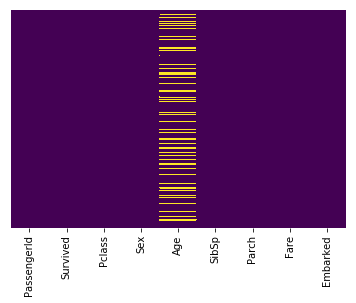

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

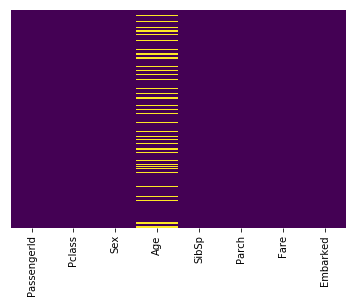

In [7]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


### Transformando em Dummies

In [9]:
new_train = pd.get_dummies(train)
new_test = pd.get_dummies(test)

In [10]:
new_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [11]:
new_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1


### Tratando os nulos

In [12]:
new_train['Age'].fillna(new_train['Age'].mean(), inplace=True)
new_test['Age'].fillna(new_test['Age'].mean(), inplace=True)
new_test['Fare'].fillna(new_test['Fare'].mean(), inplace=True)

In [13]:
new_train.isnull().sum().sort_values(ascending=False).head(10)

Embarked_S    0
Embarked_Q    0
Embarked_C    0
Sex_male      0
Sex_female    0
Fare          0
Parch         0
SibSp         0
Age           0
Pclass        0
dtype: int64

In [14]:
new_test.isnull().sum().sort_values(ascending=False).head(10)

Embarked_S    0
Embarked_Q    0
Embarked_C    0
Sex_male      0
Sex_female    0
Fare          0
Parch         0
SibSp         0
Age           0
Pclass        0
dtype: int64

### Import e escolha do Modelo

In [25]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc

from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [16]:
X = new_train.drop('Survived', axis=1)
y = new_train['Survived']

In [17]:
classifiers = [
    KNeighborsClassifier(3),
    GaussianNB(),
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(max_depth=3, random_state=0),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    ]


for clf in classifiers:
    clf.fit(X, y)
    name = clf.__class__.__name__

    print("=" * 30)
    print(name)

    print('****Results****')
    y_pred = clf.predict(X)
    cv = cross_val_score(clf, X, y, cv=10, scoring='roc_auc').mean()
    print("Accuracy:", metrics.accuracy_score(y, y_pred))
    print("Precision:", metrics.precision_score(y, y_pred))
    print("Recall:", metrics.recall_score(y, y_pred))
    print("Roc Auc", cv)

KNeighborsClassifier
****Results****
Accuracy: 0.797979797979798
Precision: 0.7956204379562044
Recall: 0.6374269005847953
Roc Auc 0.5238279432985317
GaussianNB
****Results****
Accuracy: 0.7901234567901234
Precision: 0.7246376811594203
Recall: 0.7309941520467836
Roc Auc 0.8326930085165379
LogisticRegression
****Results****
Accuracy: 0.8013468013468014
Precision: 0.7619047619047619
Recall: 0.7017543859649122
Roc Auc 0.8519285855756443
SVC
****Results****
Accuracy: 0.9932659932659933
Precision: 1.0
Recall: 0.9824561403508771
Roc Auc 0.4311281017457488
DecisionTreeClassifier
****Results****
Accuracy: 0.8271604938271605
Precision: 0.8133333333333334
Recall: 0.7134502923976608
Roc Auc 0.8506011374246668
RandomForestClassifier
****Results****
Accuracy: 0.9775533108866442
Precision: 0.9908536585365854
Recall: 0.9502923976608187
Roc Auc 0.8454905073140366
GradientBoostingClassifier
****Results****
Accuracy: 0.8978675645342312
Precision: 0.9114754098360656
Recall: 0.8128654970760234
Roc Auc 0.86

### Modelo escolhido GradientBoostingClassifier

In [38]:
modelo = GradientBoostingClassifier()    
GBC = GradientBoostingClassifier()
GBC.fit(X, y)
    
print("="*30)
print(GradientBoostingClassifier)
    
print('****Results****')
y_pred = clf.predict(X)
print("Accuracy:", metrics.accuracy_score(y, y_pred))
print("Precision:", metrics.precision_score(y, y_pred))
print("Recall:", metrics.recall_score(y, y_pred))

<class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
****Results****
Accuracy: 0.8978675645342312
Precision: 0.9114754098360656
Recall: 0.8128654970760234


In [39]:
cross_val_score(modelo, X, y, cv = 10, scoring='r2').mean()

0.1465752765752766

In [40]:
cross_val_score(modelo, X, y, cv = 10, scoring='accuracy').mean()

0.7981361366473726

In [41]:
cross_val_score(modelo, X, y, cv = 10, scoring='roc_auc').mean()

0.8667568118156354

0.9522017703639791

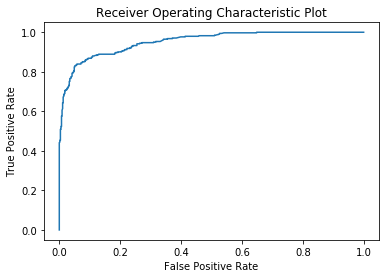

In [42]:
fpr, tpr, thr = roc_curve(y, clf.predict_proba(X)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Plot')
auc(fpr, tpr)

### Submetendo ao Kaggle

In [43]:
submission = pd.DataFrame()
submission['PassengerId'] = new_test['PassengerId']
submission['Survived'] = GBC.predict(new_test)

In [37]:
submission.to_csv('data/Titanic_Submission.csv', index=False)